In [2]:
# Taking a look at some of our data
import pandas as df

# setup lookup tables
age_lookup = {
    1:  "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

occupation_lookup = {
    0:  "other or not specified",
    1:  "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

# Load merged data (created by prepare_data.py)
merged_data = df.read_csv('../data/movies_transformed.csv', encoding='latin-1')
# get unique users
unique_users = merged_data.drop_duplicates(subset="user")

In [3]:
# Anlyze the most active times for users
# What are the most and least active hours for users?
hourly_counts = merged_data["ratings_hour"].value_counts()
most_active_hour = hourly_counts.idxmax()
most_active_hour_count = hourly_counts.max()

least_active_hour = hourly_counts.idxmin()
least_active_hour_count = hourly_counts.min()

print(
    f"Most active hour: {most_active_hour} with {most_active_hour_count} events")
print(
    f"Least active hour: {least_active_hour} with {least_active_hour_count} events")


# What the most and least active days for users?
days_counts = merged_data["ratings_day_of_week"].value_counts()

most_active_day = days_counts.idxmax()
most_active_day_count = days_counts.max()

least_active_day = days_counts.idxmin()
least_active_day_count = days_counts.min()

print(
    f"Most active day: {most_active_day} with {most_active_day_count} events")
print(
    f"Least active day: {least_active_day} with {least_active_day_count} events")


# What are the most and least active months for users?
month_count = merged_data["ratings_month"].value_counts()
most_active_month = month_count.idxmax()
most_active_month_count = month_count.max()

least_active_month = month_count.idxmin()
least_active_month_count = month_count.min()

print(
    f"Most active month: {most_active_month} with {most_active_month_count} events")
print(
    f"Least active month: {least_active_month} with {least_active_month_count} events")

Most active hour: 21 with 65491 events
Least active hour: 11 with 8617 events
Most active day: Monday with 173931 events
Least active day: Saturday with 108692 events
Most active month: 11 with 295461 events
Least active month: 3 with 8537 events


In [4]:
# Now we have a better understanding actvity with respect to time
# Let's take a look at some of our user demographics

# What are the most and least active age groups among users?
age_groups = unique_users["age"].value_counts()

most_active_age_group = age_groups.idxmax()
most_active_age_group_count = age_groups.max()

least_active_age_group = age_groups.idxmin()
least_active_age_group_count = age_groups.min()

print(
    f"Most active age group: {age_lookup[most_active_age_group]} with {most_active_age_group_count} events")
print(
    f"Least active age group: {age_lookup[least_active_age_group]} with {least_active_age_group_count} events")


# What are the most and least active occupations among users?
occupation_group = unique_users["occupation"].value_counts()

most_active_occupation_group = occupation_group.idxmax()
most_active_occupation_group_count = occupation_group.max()

least_active_occupation_group = occupation_group.idxmin()
least_active_occupation_group_count = occupation_group.min()

print(
    f"Most active age group: {occupation_lookup[most_active_occupation_group]} with {most_active_occupation_group_count} events")
print(
    f"Least active age group: {occupation_lookup[least_active_occupation_group]} with {least_active_occupation_group_count} events")


# What is the ratio of women to men?
gender_group = unique_users["gender"].value_counts()
male_count = gender_group["M"]
female_count =  gender_group["F"]

print(
    f"The number of males: {male_count} - The number of females: {female_count}")
print(
    f"The ration of women to men is {female_count/male_count}")

# From which states and cities is most traffic coming from?
state_group = unique_users["state"].value_counts()
city_group = unique_users["city"].value_counts()

most_active_state = state_group.idxmax()
most_active_state_count = state_group.max()

least_active_state = state_group.idxmin()
least_active_state_count = state_group.min()

most_active_city = city_group.idxmax()
most_active_city_count = city_group.max()

least_active_city = city_group.idxmin()
least_active_city_count = city_group.min()

print(
    f"Most active state: {most_active_state} with {most_active_state_count} events")
print(
    f"Least active state: {least_active_state} with {least_active_state_count} events")
print(
    f"Most active city: {most_active_city} with {most_active_city_count} events")
print(
    f"Least active city: {least_active_city} with {least_active_city_count} events")

Most active age group: 25-34 with 2096 events
Least active age group: Under 18 with 222 events
Most active age group: college/grad student with 759 events
Least active age group: farmer with 17 events
The number of males: 4331 - The number of females: 1709
The ration of women to men is 0.39459709074116833
Most active state: CA with 1102 events
Least active state: GU with 1 events
Most active city: Minneapolis with 172 events
Least active city: Menomonie with 1 events


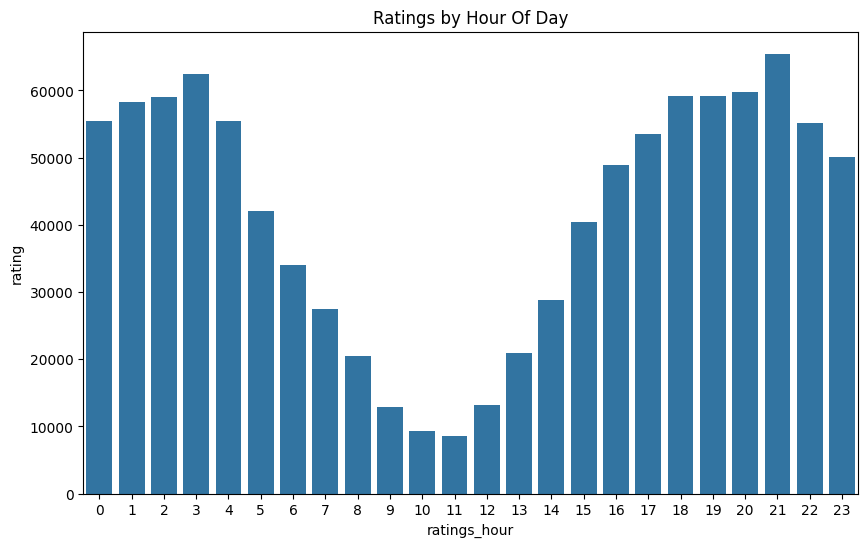

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_hour', y='rating', data=merged_data, estimator=lambda x: len(x))
plt.title('Ratings by Hour Of Day')
plt.show()

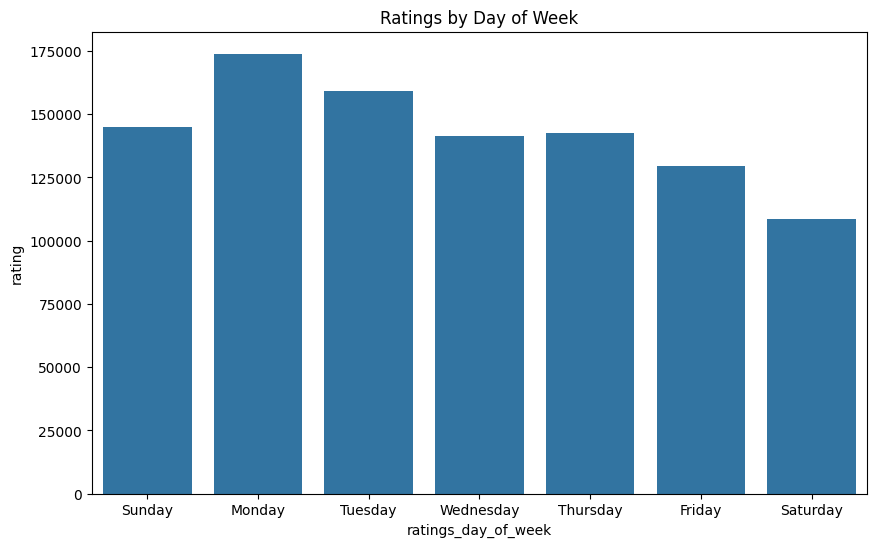

In [20]:

oredered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_day_of_week', y='rating',
            data=merged_data, order=oredered_days, estimator=lambda x: len(x))
plt.title('Ratings by Day of Week')
plt.show()

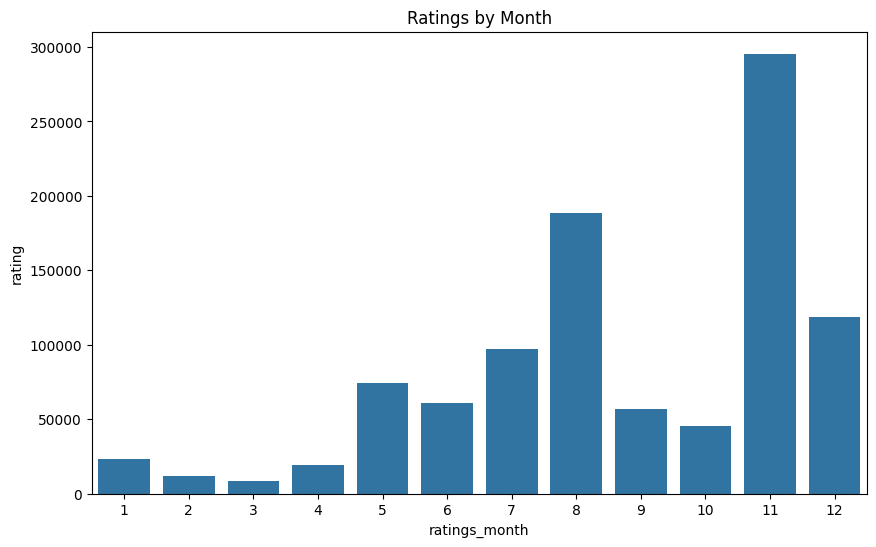

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_month', y='rating',
            data=merged_data, estimator=lambda x: len(x))
plt.title('Ratings by Month')
plt.show()

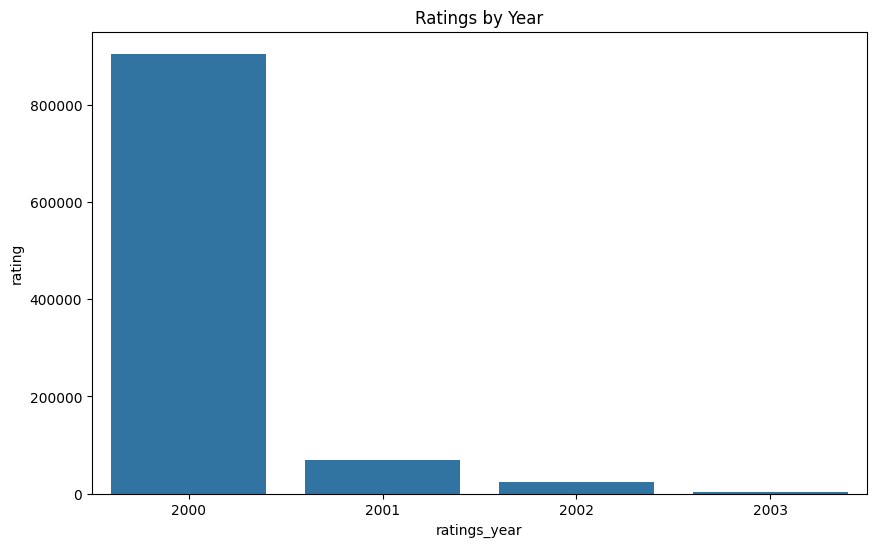

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_year', y='rating',
            data=merged_data, estimator=lambda x: len(x))
plt.title('Ratings by Year')
plt.show()

## Ratings skew toward less aged movies

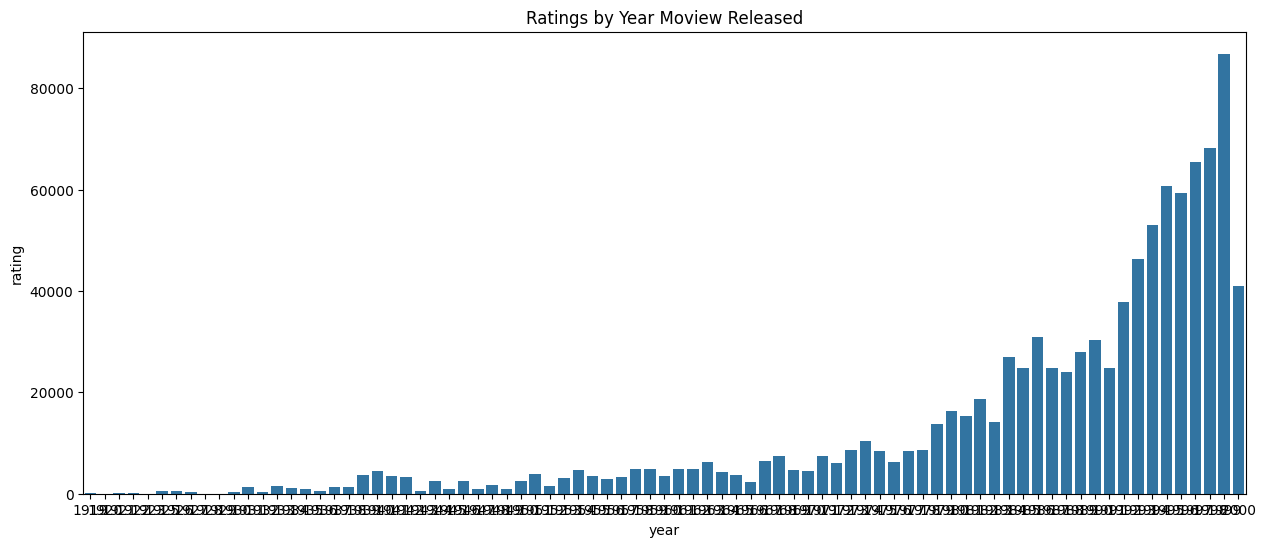

In [28]:
plt.figure(figsize=(15, 6))


sns.barplot(x='year', y='rating',
            data=merged_data, estimator=lambda x: len(x))
plt.title('Ratings by Year Moview Released')
plt.show()

<Axes: xlabel='decade', ylabel='rating'>

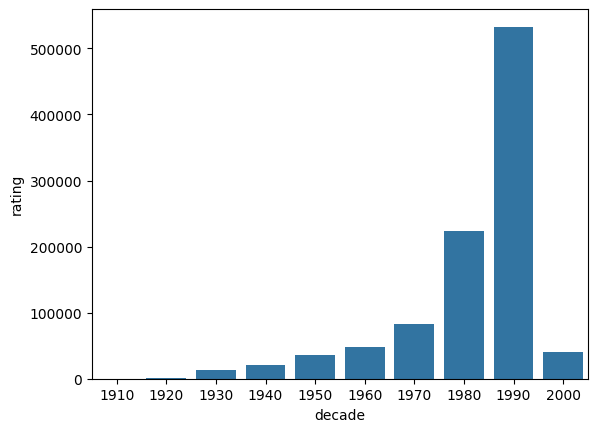

In [ ]:

merged_data['decade'] = (merged_data['year'] // 10) * 10

sns.barplot(x='decade', y='rating',
            data=merged_data, estimator=lambda x: len(x))
plt.title('Ratings by Decade of Moview Released')
plt.show()

<Axes: xlabel='year', ylabel='rating'>

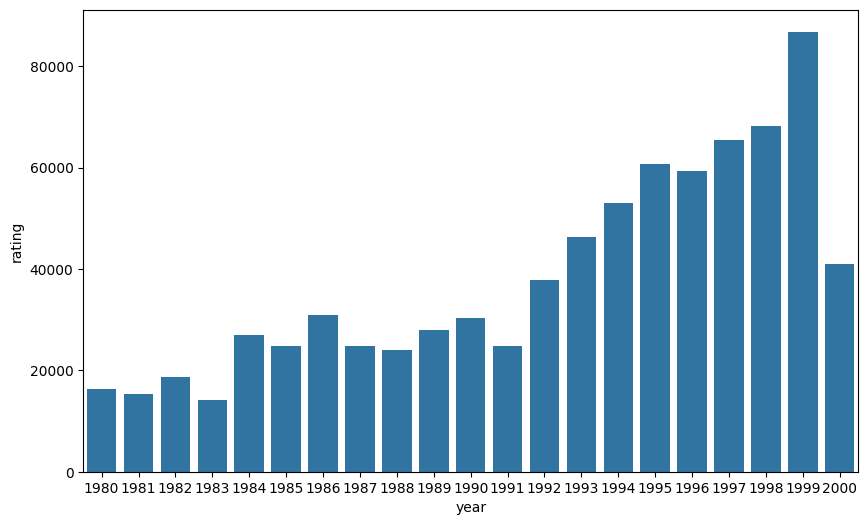

In [23]:
plt.figure(figsize=(10, 6))
filtered_data = merged_data[merged_data['year'] >= 1980].copy()

sns.barplot(x='year', y='rating',
            data=filtered_data, estimator=lambda x: len(x))